<a href="https://colab.research.google.com/github/MrCepesh/Innopolis/blob/main/%D0%94%D0%97_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 49.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=0dab69f9a36e745651cad465e35759b4c1333cc7902a28175be119e48fc937ab
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [5]:
import pandas as pd
import numpy as np


In [6]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext('local')
spark = SparkSession(sc)

In [7]:
from google.colab import files # Загрузим фаил в Колаб
uploaded = files.upload()

Saving iris.csv to iris.csv


1) Загрузите данные при помощи spark.read.csv из приложенного файла

In [8]:
df = spark.read.options(sep=",", header=True, quote="").csv('iris.csv')

2.Выведите 5 первых строк данных

In [9]:
df.show(5)

+-------------+---------------+----------------+---------------+------------+
|"sepal.length|""sepal.width""|""petal.length""|""petal.width""|""variety"""|
+-------------+---------------+----------------+---------------+------------+
|         "5.1|            3.5|             1.4|             .2| ""Setosa"""|
|         "4.9|              3|             1.4|             .2| ""Setosa"""|
|         "4.7|            3.2|             1.3|             .2| ""Setosa"""|
|         "4.6|            3.1|             1.5|             .2| ""Setosa"""|
|           "5|            3.6|             1.4|             .2| ""Setosa"""|
+-------------+---------------+----------------+---------------+------------+
only showing top 5 rows



In [10]:
df.printSchema()

root
 |-- "sepal.length: string (nullable = true)
 |-- ""sepal.width"": string (nullable = true)
 |-- ""petal.length"": string (nullable = true)
 |-- ""petal.width"": string (nullable = true)
 |-- ""variety""": string (nullable = true)



In [11]:
# Приведем названия к единому стандарту через to.DF
df = df.toDF("sepal_length","sepal_width","petal_length","petal_width","variety")
df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    variety|
+------------+-----------+------------+-----------+-----------+
|        "5.1|        3.5|         1.4|         .2|""Setosa"""|
|        "4.9|          3|         1.4|         .2|""Setosa"""|
|        "4.7|        3.2|         1.3|         .2|""Setosa"""|
|        "4.6|        3.1|         1.5|         .2|""Setosa"""|
|          "5|        3.6|         1.4|         .2|""Setosa"""|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [12]:
from pyspark.sql.functions import *

from pyspark.sql.types import DoubleType

In [13]:
# Удалим лишние кавычки
df_new = df.withColumn("sepal_length", regexp_replace(col("sepal_length"), '"', ''))\
    .withColumn("variety", regexp_replace(col("variety"), '"', ''))

In [14]:
df_new.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|         .2| Setosa|
|         4.9|          3|         1.4|         .2| Setosa|
|         4.7|        3.2|         1.3|         .2| Setosa|
|         4.6|        3.1|         1.5|         .2| Setosa|
|           5|        3.6|         1.4|         .2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [15]:
# переведем имеющийся тип "строка" в "double"

df_new = df_new \
.withColumn('sepal_length', col('sepal_length').cast(DoubleType())) \
.withColumn('sepal_width', col('sepal_width').cast(DoubleType())) \
.withColumn('petal_length', col('petal_length').cast(DoubleType())) \
.withColumn('petal_width', col('petal_width').cast(DoubleType()))
df_new.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- variety: string (nullable = true)



In [16]:
df_new.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



3.Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width').

In [17]:
df_new.summary().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    25%|               5.1|                2.8|               1.6|               0.3|     null|
|    50%|               5.8|                3.0|               4.3|               1.3|     null|
|    75%|               6.4|                3.3|               5.1|               1.8|     null|
|    max|               7.9|  

In [18]:
# Найдем искомые значения через groupBy

df_new.groupBy("variety").avg('sepal_length','sepal_width','petal_length','petal_width').show()

df_new.groupBy("variety").min('sepal_length','sepal_width','petal_length','petal_width').show()

df_new.groupBy("variety").max('sepal_length','sepal_width','petal_length','petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|    

4.Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам цветков.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Преобразуем в pandas для визуализации
df_new_pnd = df_new.toPandas()

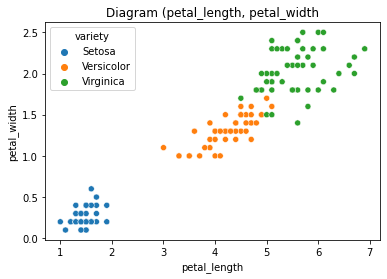

In [21]:
sns.scatterplot(data = df_new_pnd, x = "petal_length", y = "petal_width", hue = "variety").set(title='Diagram (petal_length, petal_width')
plt.show()

5.Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA -ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).

Если petal_length < 2, а petal_width < 0.8, то это Setosa, в другом случае Unknown.

6.При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием.

In [25]:
df_new_pred = df_new.withColumn("predict", when((df_new.petal_length < 2) & (df_new.petal_width < 0.8), lit("Setosa")).otherwise(lit("Unknown")))
df_new_pred.show(10)

+------------+-----------+------------+-----------+-------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|predict|
+------------+-----------+------------+-----------+-------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa| Setosa|
+------------+-----------+------------+-----------+-------+-------+
only showing top 10 rows



7.Проверьте качество своего предсказания.                                  
Для этого:7.1.Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный классбыл так же Setosa.                                             7.2 Подсчитайте количество строк, где Вы предсказаликласс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" -!=)

In [36]:
df_new_pred.agg(
    count(when(col("variety") == "Setosa", True)), # сколько всего вариантов Setosa
    count(when((col("variety") == "Setosa") & (col("predict") == "Setosa"), True)), # совпадения
    count(when((col("variety") != "Setosa") & (col("predict") == "Setosa"), True)) # несовпадения
    ).show()

+-------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------------+
|count(CASE WHEN (variety = Setosa) THEN true END)|count(CASE WHEN ((variety = Setosa) AND (predict = Setosa)) THEN true END)|count(CASE WHEN ((NOT (variety = Setosa)) AND (predict = Setosa)) THEN true END)|
+-------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------------+
|                                               50|                                                                        50|                                                                               0|
+-------------------------------------------------+--------------------------------------------------------------------------+------------------------------------------